<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Coffee & Tea Subreddits Analysis - NLP

Note: This is part 1 of the code notebook covering the following:-
1. [Problem Statement](#1.-Problem-Statement)
2. [Background](#2.-Background)
3. [Library Imports & Functions Creation](#3.-Library-Imports-&-Functions-Creation)
4. [Data-Cleaning](#4.-Data-Cleaning)
5. [Exploratory Data Analysis (EDA)](#5.-Exploratory-Data-Analysis-(EDA))
6. [Summary of Notebook 1](#6.-Summary-of-Notebook-1)

## 1. Problem Statement

This project is meant to provide market research for owners planning to start their new cafe. The strategy is to analyze data from the 'Coffee' and 'Tea' subreddits so as to influence the business decisions of the cafe set-up.

In summary, the project shall :-

1. extract data from the 'Coffee' and 'Tea' subreddits;
2. perform data cleaning on the data;
3. identify useful and popular topics related to coffee and tea; 
4. produce a classification model to classify texts according to either coffee or tea topic; and
5. provide sentiment analysis on each subreddit in general and specific topics of interest under each subreddit.

## 2. Background

Based on [market research](https://backlinko.com/reddit-users), Reddit is a fast growing community platform categorized around different interests. With more than 430 million monthly active users and over 100,000 active communities (as of Oct 21), it is ranked among the most popular social networks worldwide. With its growing online presence, this project shall leverage on Reddit's potential to conduct market research.

The market research will mainly help the cafe in two ways:

1. Identifying useful and popular topics related to coffee and tea that can provide business ideas such as choice of products, presentation of products, coffee/tea-making equipments etc. The usefulness of these topics will be further validated using sentiment analysis.

2. Providing a useful classification model to identify posts related to coffee and tea. This can enhance the feedback channel for customers providing feedback to the cafe knowing which kind of products (coffee or tea) that they are commenting on. The classification model can be further enchanced to include other range of products offered such as cake etc. Additionally, the classification model can also be utilised when the cafe tap on other channels like facebook, instalgram to gather more customer feedbacks for analysis.

## 3. Library Imports & Functions Creation

In [1]:
import cleantext
import datetime
import demoji
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import re
import string
import warnings
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from warnings import simplefilter

In [2]:
def time_convertor(x):
    x = datetime.datetime.utcfromtimestamp(x)
    x = x.date()
    return x

In [3]:
def lower_demoji_clean(x):
    x = x.lower()
    x = demoji.replace_with_desc(x)
    x = cleantext.clean(x)
    return x

In [4]:
def remove_punctuations(x):
    for char in string.punctuation:
        x = x.replace(char, '')
    return x

In [5]:
def lemmatize(x):
    lemmatizer = WordNetLemmatizer()
    x = lemmatizer.lemmatize(x)
    return x

In [6]:
def join_sentence(x):
    x = ' '.join(x)
    return x

In [7]:
def stopwords_cleaner(x):
    x = x.split()
    for i in stopwords:
        while i in x:
            x.remove(i)
    x = ' '.join(x)
    return x

## 4. Data Cleaning

In [8]:
# Importing the datasets
coffee_data = pd.read_csv('coffee_data.csv')
tea_data = pd.read_csv('tea_data.csv', low_memory=False)

### 4.1 Examining Dataset

In [9]:
# Getting a quick feel for the data
pd.set_option('display.max_columns', None)
coffee_data.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_created_from_ads_ui,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_richtext,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,post_hint,preview,pwls,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,thumbnail_height,thumbnail_width,title,total_awards_received,treatment_tags,upvote_ratio,url,url_overridden_by_dest,whitelist_status,wls,removed_by_category,gallery_data,is_gallery,media_metadata,author_flair_background_color,author_flair_text_color,distinguished,suggested_sort,author_flair_template_id,media,media_embed,secure_media,secure_media_embed,author_cakeday,edited,banned_by,call_to_action,category
0,[],False,_FormerFarmer,NaN,[],NaN,text,t2_97nkyu0,False,False,False,[],False,False,1664581292,reddit.com,https://www.reddit.com/r/Coffee/comments/xsg6z...,{},xsg6zs,False,True,False,False,False,True,False,False,NaN,[],dark,text,False,False,False,0,0,False,all_ads,/r/Coffee/comments/xsg6zs/coffee_reduces_cardi...,False,link,"{'enabled': False, 'images': [{'id': 'Zf3yV5Yo...",6,1664581303,1,NaN,False,False,False,Coffee,t5_2qhze,1057686,public,default,77.0,140.0,Coffee reduces cardiovascular disease - large ...,0,[],1.0,https://www.reddit.com/r/science/comments/xrzc...,https://www.reddit.com/r/science/comments/xrzc...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,Geegoriel9,NaN,[],NaN,text,t2_rxuc56yj,False,False,False,[],False,False,1664579910,self.Coffee,https://www.reddit.com/r/Coffee/comments/xsfos...,{},xsfosl,False,True,False,False,False,True,True,False,NaN,[],dark,text,False,False,True,0,0,False,all_ads,/r/Coffee/comments/xsfosl/where_do_europeans_g...,False,NaN,NaN,6,1664579920,1,NaN,True,False,False,Coffee,t5_2qhze,1057685,public,self,NaN,NaN,"Where do Europeans get their coffee, Stareuros?",0,[],1.0,https://www.reddit.com/r/Coffee/comments/xsfos...,NaN,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,TheRealOsamaru,NaN,[],NaN,text,t2_1wrhxlk5,False,False,False,[],False,False,1664579037,self.Coffee,https://www.reddit.com/r/Coffee/comments/xsfd7...,{},xsfd77,False,True,False,False,False,True,True,False,NaN,[],dark,text,False,False,True,0,0,False,all_ads,/r/Coffee/comments/xsfd77/dark_and_stormy_coff...,False,NaN,NaN,6,1664579048,1,12oz Black coffee (cold brew or hot)\n\n8oz ST...,True,False,False,Coffee,t5_2qhze,1057687,public,self,NaN,NaN,Dark and Stormy Coffee; why am I just learning...,0,[],1.0,https://www.reddit.com/r/Coffee/comments/xsfd7...,NaN,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,Complex_Secretary_14,NaN,[],NaN,text,t2_52g92zw8,False,False,False,[],False,False,1664578285,self.Coffee,https://www.reddit.com/r/Coffee/comments/xsf2p...,{},xsf2p4,False,True,False,False,False,True,True,False,NaN,[],dark,text,False,False,True,0,0,False,all_ads,/r/Coffee/comments/xsf2p4/should_i_learn_how_t...,False,NaN,NaN,6,1664578295,1,Since having quality freshly roasted beans is ...,True,False,False,Coffee,t5_2qhze,1057684,public,self,NaN,NaN,Should I learn how to roast coffee beans befor...,0,[],1.0,https://www.reddit.com/r/Coffee/comments/xsf2p...,NaN,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[],False,deemonstalker,NaN,[],NaN,text,t2_e9205,False,False,False,[],False,False,1664577472,/r/Coffee/comments/xseruc/roast_me/,https://www.reddit.com/r/Coffee/comments/xseru...,{},xseruc,False,True,False,False,False,True,False,Tru

In [10]:
tea_data.head()

,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_created_from_ads_ui,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_css_class,link_flair_richtext,link_flair_text,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,pwls,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,title,total_awards_received,treatment_tags,upvote_ratio,url,whitelist_status,wls,link_flair_template_id,post_hint,preview,thumbnail_height,thumbnail_width,url_overridden_by_dest,author_flair_template_id,author_flair_text_color,removed_by_category,gallery_data,is_gallery,media_metadata,poll_data,author_flair_background_color,crosspost_parent,crosspost_parent_list,media,media_embed,secure_media,secure_media_embed,author_cakeday,banned_by,edited,collections
0,[],False,psydchicjohn,NaN,[],NaN,text,t2_7j12i,False,False,False,[],False,False,1664578075,self.tea,https://www.reddit.com/r/tea/comments/xsezwy/c...,{},xsezwy,False,True,False,False,False,True,True,False,NaN,reco,"[{'e': 'text', 't': 'Recommendation'}]",Recommendation,dark,richtext,False,False,True,0,0,False,all_ads,/r/tea/comments/xsezwy/can_someone_recommend_a...,False,6,1664578086,1,"My lovely wife has been drinking Sloane ""Heave...",True,False,False,tea,t5_2qq5e,687870,public,self,Can someone recommend a tea for me?,0,[],1.0,https://www.reddit.com/r/tea/comments/xsezwy/c...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[],False,piecesofagrippa,NaN,[],NaN,text,t2_gepwr23i,False,False,False,[],False,False,1664575731,self.tea,https://www.reddit.com/r/tea/comments/xse3st/b...,{},xse3st,False,True,False,False,False,True,True,False,NaN,NaN,[],NaN,dark,text,False,False,True,0,0,False,all_ads,/r/tea/comments/xse3st/buying_chamomile_in_us/,False,6,1664575742,1,I took a look at the vendors list but none of ...,True,False,False,tea,t5_2qq5e,687872,public,self,Buying Chamomile in US,0,[],1.0,https://www.reddit.com/r/tea/comments/xse3st/b...,all_ads,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[],False,SamGoldfield,NaN,[],NaN,text,t2_3aw3j,False,False,False,[],False,False,1664573221,teavern.com,https://www.reddit.com/r/tea/comments/xsd499/i...,{},xsd499,False,True,False,False,False,True,False,False,NaN,help,"[{'e': 'text', 't': 'Question/Help'}]",Question/Help,dark,richtext,False,False,True,0,0,False,all_ads,/r/tea/comments/xsd499/is_this_a_good_introduc...,False,6,1664573232,1,NaN,False,False,False,tea,t5_2qq5e,687869,public,https://b.thumbs.redditmedia.com/z5qqKKY20zGQx...,Is this a good introduction to kamairicha?,0,[],1.0,https://teavern.com/products/wild-kamairicha,all_ads,6,64c60b7e-9f57-11e4-adfe-22000b680aa5,link,"{'enabled': False, 'images': [{'id': 'M_udiZag...",140.0,140.0,https://teavern.com/products/wild-kamairicha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[],False,yddandy,NaN,"[{'e': 'text', 't': 'keemunthusiast'}]",keemunthusiast,richtext,t2_5f4myn,False,False,False,[],False,False,1664568074,self.tea,https://www.reddit.com/r/tea/comments/xsazo7/i...,{},xsazo7,False,True,False,False,False,True,True,False,NaN,disc,"[{'e': 'text', 't': 'Discussion'}]",Discussion,dark,richtext,False,False,True,0,0,False,all_ads,/r/tea/comments/xsazo7/i_was_curious_about_the...,False,6,1664568085,1,I noticed that pretty much everybody selling C...,False,False,False,tea,t5_2qq5e,687868,public,self,I was curious about the story on Colombian bla...,0,[],1.0,https://www.reddit.com/r/tea/comments/xsazo7/i

In [11]:
print(f'Number of Columns for Coffee Dataset: {coffee_data.shape[1]}')
print(f'Number of Columns for Tea Dataset: {tea_data.shape[1]}')

Number of Columns for Coffee Dataset: 82
Number of Columns for Tea Dataset: 85


In [12]:
print(f'Number of Rows for Coffee Dataset: {coffee_data.shape[0]}')
print(f'Number of Rows for Tea Dataset: {tea_data.shape[0]}')

Number of Rows for Coffee Dataset: 14979
Number of Rows for Tea Dataset: 14971


### Observation

1. The coffee dataset has 14979 rows and 82 columns, while the tea dataset has 14971 rows and 85 columns.
2. Of interest to the project are the following columns:
    - <mark>subreddit</mark>: Indicating which subreddit the post belongs to;
    - <mark>author</mark>: Indicating the author of the post;
    - <mark>created_utc</mark>: Indicating the time posted;
    - <mark>title</mark>: Title of the post;
    - <mark>selftext</mark>: Body of the post; and
    - <mark>removed_by_category</mark>: Indicating if a post was being removed. These are posts that violated the rules of the subreddit or the terms and polices of reddit in general. For more information, please read the [changelog](https://www.reddit.com/r/changelog/comments/e66fql/post_removal_details_on_the_new_design_redesign/).

### 4.2 Steamlining Datasets

We shall proceed to streamline the datasets by keeping only relevant columns indicated in the previous section.

In [13]:
# Keeping only relevant columns
coffee_df = coffee_data[['subreddit', 'author', 'created_utc', 'title', 'selftext', 'removed_by_category']]
tea_df = tea_data[['subreddit', 'author', 'created_utc', 'title', 'selftext', 'removed_by_category']]

In [14]:
coffee_df.head()

,subreddit,author,created_utc,title,selftext,removed_by_category
0,Coffee,_FormerFarmer,1664581292,Coffee reduces cardiovascular disease - large ...,NaN,NaN
1,Coffee,Geegoriel9,1664579910,"Where do Europeans get their coffee, Stareuros?",NaN,NaN
2,Coffee,TheRealOsamaru,1664579037,Dark and Stormy Coffee; why am I just learning...,12oz Black coffee (cold brew or hot)\n\n8oz ST...,NaN
3,Coffee,Complex_Secretary_14,1664578285,Should I learn how to roast coffee beans befor...,Since having quality freshly roasted beans is ...,NaN
4,Coffee,deemonstalker,1664577472,Roast me!,NaN,NaN


In [15]:
tea_df.head()

,subreddit,author,created_utc,title,selftext,removed_by_category
0,tea,psydchicjohn,1664578075,Can someone recommend a tea for me?,"My lovely wife has been drinking Sloane ""Heave...",NaN
1,tea,piecesofagrippa,1664575731,Buying Chamomile in US,I took a look at the vendors list but none of ...,NaN
2,tea,SamGoldfield,1664573221,Is this a good introduction to kamairicha?,NaN,NaN
3,tea,yddandy,1664568074,I was curious about the story on Colombian bla...,I noticed that pretty much everybody selling C...,NaN
4,tea,BigBart123,1664559432,"Sencha, Gyokuro, metals, etc.",[removed],automod_filtered


In [16]:
print(f'Number of Columns for Coffee Dataset after 4.2: {coffee_df.shape[1]}')
print(f'Number of Columns for Tea Dataset after 4.2: {tea_df.shape[1]}')

Number of Columns for Coffee Dataset after 4.2: 6
Number of Columns for Tea Dataset after 4.2: 6


### 4.3 Checking for Null Data

In [17]:
# Creating a table for null values for coffee dataset
pd.DataFrame(coffee_df.isna().sum())
pd.DataFrame(coffee_df.isna().sum()).reset_index()
missing_df = pd.DataFrame(coffee_df.isna().sum()).reset_index()
missing_df.columns = ['col', 'num_nulls'] 
missing_df['%nulls'] = missing_df['num_nulls']*100/len(coffee_df)
missing_df = missing_df[missing_df['num_nulls']>0].sort_values(by=["%nulls"], ascending=False)
print(f'There are {len(missing_df)} columns with missing values.')
print('')
missing_df

There are 2 columns with missing values.



,col,num_nulls,%nulls
5,removed_by_category,13879,92.656386
4,selftext,4749,31.704386


In [18]:
# Creating a table for null values for tea dataset
pd.DataFrame(tea_df.isna().sum())
pd.DataFrame(tea_df.isna().sum()).reset_index()
missing_df = pd.DataFrame(tea_df.isna().sum()).reset_index()
missing_df.columns = ['col', 'num_nulls'] 
missing_df['%nulls'] = missing_df['num_nulls']*100/len(tea_df)
missing_df = missing_df[missing_df['num_nulls']>0].sort_values(by=["%nulls"], ascending=False)
print(f'There are {len(missing_df)} columns with missing values.')
print('')
missing_df

There are 2 columns with missing values.



,col,num_nulls,%nulls
5,removed_by_category,12401,82.833478
4,selftext,7841,52.374591


### Observation

1. There are null values in two columns of each dataset.
2. Posts without 'selftext' are posts with only title.
3. Posts without 'removed_by_category' are posts that were not removed.
4. Moving forward, we shall fill the null values with:
    - 'NA' for 'removed_by_category' column; and
    - '-' for 'selftext' column (this will serve as a temporary placeholder which can be easily removed later).

In [19]:
pd.options.mode.chained_assignment = None
coffee_df.loc[:, "removed_by_category"].fillna('NA', inplace = True)
coffee_df.loc[:, "selftext"].fillna('-', inplace = True)
tea_df.loc[:, "removed_by_category"].fillna('NA', inplace = True)
tea_df.loc[:, "selftext"].fillna('-', inplace = True)

### 4.4 Deleting Removed Posts

We shall proceed to examine the 'removed_by_category' column.

In [20]:
# Seeing the breakdown of removed posts for coffee dataset
coffee_df["removed_by_category"].value_counts()

NA                  13879
reddit                714
moderator             318
automod_filtered       39
deleted                29
Name: removed_by_category, dtype: int64

In [21]:
# Seeing the breakdown of removed posts for tea dataset
tea_df["removed_by_category"].value_counts()

NA                  12401
automod_filtered     2031
reddit                381
moderator             118
deleted                40
Name: removed_by_category, dtype: int64

### Observation

1. Null values were imputed with 'NA'.
2. Posts were removed for few reasons :-
    - Deleted: Probably deleted by the user
    - Moderator: Removed by the moderator of the subreddit
    - Reddit: Removed by reddit
    - Automod_filtered: Filtered due to harmful or inappropriate content
3. Moving forward, we shall drop all the removed posts as they were deemed unsuitable posts.

In [22]:
# Removing the removed posts
coffee_df = coffee_df[coffee_df["removed_by_category"] == 'NA']
tea_df = tea_df[tea_df["removed_by_category"] == 'NA']

In [23]:
# Dropping the 'removed_by_category' column as it is no longer necessary
coffee_df.drop(columns=['removed_by_category'], inplace = True)
tea_df.drop(columns=['removed_by_category'], inplace = True)

In [24]:
# Refreshing the index for each dataset
coffee_df.reset_index(drop=True, inplace=True)
tea_df.reset_index(drop=True, inplace=True)

In [25]:
print(f'Number of Columns for Coffee Dataset after 4.4: {coffee_df.shape[1]}')
print(f'Number of Columns for Tea Dataset after 4.4: {tea_df.shape[1]}')

Number of Columns for Coffee Dataset after 4.4: 5
Number of Columns for Tea Dataset after 4.4: 5


In [26]:
print(f'Number of Rows for Coffee Dataset after 4.4: {coffee_df.shape[0]}')
print(f'Number of Rows for Coffee Dataset after 4.4: {tea_df.shape[0]}')

Number of Rows for Coffee Dataset after 4.4: 13879
Number of Rows for Coffee Dataset after 4.4: 12401


### 4.5 Editing Time of Posts

We shall proceed to examine the 'created_utc' column. 

In order to make the time readable, we shall change the time from epoch time to date time.

In [27]:
# Applying the time convertor function
coffee_df['created_utc'] = coffee_df['created_utc'].apply(time_convertor)
tea_df['created_utc'] = tea_df['created_utc'].apply(time_convertor)
print(f'Sample: {coffee_df["created_utc"][1]}')

Sample: 2022-09-30


In [28]:
# Renaming the column for accuracy
coffee_df.rename(columns = {'created_utc':'date_posted'}, inplace = True)
tea_df.rename(columns = {'created_utc':'date_posted'}, inplace = True)

### 4.6 Checking for Duplicated Data

We shall check for repeated posts by looking into those authors with the highest posts.

The process is as follows:
1. Check all the usernames with more 20 posts for both datasets (this is done backend);
2. Pick out the usernames with more than 5 similar posts (see below);
3. Delete similar posts under each username.

In [29]:
# Showing all the usernames with more than 20 posts for coffee dataset
coffee_df['author'].value_counts().head(5)

menschmaschine5         402
ImUntilted               33
Maleficent-Number-10     31
jeebz69                  26
Complex_Secretary_14     26
Name: author, dtype: int64

In [30]:
# Showing all the usernames with more than 20 posts for coffee dataset
tea_df['author'].value_counts().head(30)

AutoModerator           453
Ledifolia                38
plantas-y-te             34
ankhlol                  33
QuestionsQuestions2o     30
Brickyard_19             29
RBFQ                     28
kenshinkan08             28
jackelliott425           27
mcav2319                 27
Malloy95                 26
Rescue_9                 26
darkrealm190             26
throughthewoods4         25
the_greasy_goose         25
Bass_slapper_            24
BambooBucko              24
user987632               24
teadrinkers88            24
LiquidProustTeas         23
SteepedApp               23
ttv_CitrusBros           23
Hamsteren2               22
DonChako                 21
sencha_kitty             21
thecolinconaty           21
_Invisible-Child_        21
Kalevalatar              20
LSE_student              20
Civil_End_4863           20
Name: author, dtype: int64

In [31]:
# Posts by menschmaschine5
coffee_automoderator = coffee_df[coffee_df['author'] == 'menschmaschine5']
coffee_automoderator['title'].value_counts()

[MOD] The Daily Question Thread                                             263
[MOD] What have you been brewing this week?/ Coffee bean recommendations     38
[MOD] Inside Scoop - Ask the coffee industry                                 33
[MOD] The Official Deal Thread                                               33
[MOD] Show off your gear! - Battle-station Central                           32
[MOD] The official deal thread                                                2
[MOD] Show off your gear! - Battle-Station Central                            1
Name: title, dtype: int64

In [32]:
# Posts by jeebz69
coffee_jeebz69 = coffee_df[coffee_df['author'] == 'jeebz69']
coffee_jeebz69['title'].value_counts()

How difficult is it to operate this thing?    26
Name: title, dtype: int64

In [33]:
# Posts by AutoModerator
tea_automoderator = tea_df[tea_df['author'] == 'AutoModerator']
pd.set_option('display.max_rows', None)
tea_automoderator['title']

14       What's in your cup? Daily discussion, question...
69       What's in your cup? Daily discussion, question...
94       What's in your cup? Daily discussion, question...
123                 Marketing Monday! - September 26, 2022
124      What's in your cup? Daily discussion, question...
161      What's in your cup? Daily discussion, question...
185      What's in your cup? Daily discussion, question...
217      What's in your cup? Daily discussion, question...
243      What's in your cup? Daily discussion, question...
271      What's in your cup? Daily discussion, question...
300      What's in your cup? Daily discussion, question...
348                 Marketing Monday! - September 19, 2022
349      What's in your cup? Daily discussion, question...
382      What's in your cup? Daily discussion, question...
408      What's in your cup? Daily discussion, question...
442      What's in your cup? Daily discussion, question...
469      What's in your cup? Daily discussion, question.

### Observation

1. There are two usernames with significantly higher number of posts as compared to the other users.
2. Three usernames were found to have recurring posts.
3. Posts from username 'menschmaschine5':
    - User submitted posts that are recurring, namely:
        - [MOD] The Daily Question Thread
        - [MOD] What have you been brewing this week?/ Coffee bean recommendations
        - [MOD] The Official Deal Thread
        - [MOD] Inside Scoop - Ask the coffee industry
        - [MOD] Show off your gear! - Battle-station Central
4. Posts from username 'jeebz69':
    - User submitted posts that are recurring, namely:
        - How difficult is it to operate this thing?
5. Posts from username 'AutoModerator':
    - User is actually an auto-moderator bot. For more info, see this [thread](https://www.reddit.com/wiki/automoderator/).
    - Bot submitted posts that are recurring with differing dates, namely:
        - What's in your cup? Daily discussion, questions and stories
        - Marketing Monday!
6. For all the recurring posts, I will only keep one post of each to eliminate duplicated data.

### Username from Coffee Dataset: menschmaschine5

There are five kinds of recurring posts.

In [34]:
# Getting an overview
coffee_df[coffee_df['author'] == 'menschmaschine5'].head()

,subreddit,author,date_posted,title,selftext
28,Coffee,menschmaschine5,2022-09-30,[MOD] What have you been brewing this week?/ C...,Hey everyone!\n\nWelcome back to the weekly /r...
36,Coffee,menschmaschine5,2022-09-30,[MOD] The Daily Question Thread,\n\nWelcome to the daily [/r/Coffee](https://...
68,Coffee,menschmaschine5,2022-09-29,[MOD] Inside Scoop - Ask the coffee industry,Let's see your battle-stations or new purchase...
79,Coffee,menschmaschine5,2022-09-29,[MOD] The Daily Question Thread,\n\nWelcome to the daily [/r/Coffee](https://...
139,Coffee,menschmaschine5,2022-09-28,[MOD] The Daily Question Thread,\n\nWelcome to the daily [/r/Coffee](https://...


In [35]:
# Dropping all the posts with the same titles
coffee_df[coffee_df['author'] == 'menschmaschine5'] = coffee_df[coffee_df['author'] == 'menschmaschine5'].drop_duplicates(subset=['author','title'])

In [36]:
coffee_df.dropna(inplace=True)

In [37]:
# Remaining posts
coffee_df[coffee_df['author'] == 'menschmaschine5']['title'].value_counts()

[MOD] What have you been brewing this week?/ Coffee bean recommendations    1
[MOD] The Daily Question Thread                                             1
[MOD] Inside Scoop - Ask the coffee industry                                1
[MOD] The Official Deal Thread                                              1
[MOD] Show off your gear! - Battle-station Central                          1
[MOD] The official deal thread                                              1
[MOD] Show off your gear! - Battle-Station Central                          1
Name: title, dtype: int64

In [38]:
# Dropping those posts that are technically the same but marked different due to capital letter(s)
coffee_df = coffee_df[coffee_df['title'] != '[MOD] The official deal thread']
coffee_df = coffee_df[coffee_df['title'] != '[MOD] Show off your gear! - Battle-station Central']

### Username from Coffee Dataset: jeebz69

In [39]:
# Duplicated posts are all posted on the same day
coffee_df[coffee_df['author'] == 'jeebz69'].head()

,subreddit,author,date_posted,title,selftext
5137,Coffee,jeebz69,2022-06-17,How difficult is it to operate this thing?,-
5151,Coffee,jeebz69,2022-06-17,How difficult is it to operate this thing?,-
5152,Coffee,jeebz69,2022-06-17,How difficult is it to operate this thing?,-
5154,Coffee,jeebz69,2022-06-17,How difficult is it to operate this thing?,-
5155,Coffee,jeebz69,2022-06-17,How difficult is it to operate this thing?,-


In [40]:
coffee_df[coffee_df['author'] == 'jeebz69'] = coffee_df[coffee_df['author'] == 'jeebz69'].drop_duplicates(subset=['author', 'date_posted'])

In [41]:
# Checking that only one is retained
(coffee_df[coffee_df['author'] == 'jeebz69'])['title'].value_counts()

How difficult is it to operate this thing?    1
Name: title, dtype: int64

In [42]:
coffee_df.dropna(inplace=True)

### Bot from Coffee Dataset: AutoModerator

In [43]:
# See latest duplicated posts
tea_df[tea_df['author'] == 'AutoModerator'].head(5)

,subreddit,author,date_posted,title,selftext
14,tea,AutoModerator,2022-09-30,"What's in your cup? Daily discussion, question...",What are you drinking today? What questions h...
69,tea,AutoModerator,2022-09-28,"What's in your cup? Daily discussion, question...",What are you drinking today? What questions h...
94,tea,AutoModerator,2022-09-27,"What's in your cup? Daily discussion, question...",What are you drinking today? What questions h...
123,tea,AutoModerator,2022-09-26,"Marketing Monday! - September 26, 2022",We realize there are lots of people involved i...
124,tea,AutoModerator,2022-09-26,"What's in your cup? Daily discussion, question...",What are you drinking today? What questions h...


In [44]:
# the strategy is to change the name of 'AutoModerator' temporarily and elimate all the other posts
tea_df.at[14, 'author'] = "AutoModerator1"
tea_df.at[123, 'author'] = "AutoModerator1"

In [45]:
tea_df = tea_df[tea_df['author'] != 'AutoModerator']

In [46]:
tea_df.at[14, 'author'] = "AutoModerator"
tea_df.at[123, 'author'] = "AutoModerator"

In [47]:
tea_df[tea_df['author'] == 'AutoModerator'].head(5)

,subreddit,author,date_posted,title,selftext
14,tea,AutoModerator,2022-09-30,"What's in your cup? Daily discussion, question...",What are you drinking today? What questions h...
123,tea,AutoModerator,2022-09-26,"Marketing Monday! - September 26, 2022",We realize there are lots of people involved i...


In [48]:
print(f'Number of Rows for Coffee Dataset after 4.6: {coffee_df.shape[0]}')
print(f'Number of Rows for Coffee Dataset after 4.6: {tea_df.shape[0]}')

Number of Rows for Coffee Dataset after 4.6: 13457
Number of Rows for Coffee Dataset after 4.6: 11950


### 4.7 Editing Title and Selftext columns

We shall proceed to work on the 'title' and 'selftext' columns for each dataset.

The process is as follows:
1. Combine both 'title' and 'selftext' columns into a new column called 'text';
2. Column 'text' will be left untouched for sentiment analysis (to be used in notebook 3);
3. Create a new column 'text_cleaned' from column 'text' with the following cleaning for EDA:
    - Lowercase all the words
    - Convert emojis into descriptions
    - Remove all unnesscary spacing for words
    - Remove all url links
    - Apply lemmatization to standardise words
4. Export datasets to CSV files for classfication model (notebook 2) and sentiment analysis (notebook 3)

#### Combining 'title' and 'selftext' columns into 'text' column

In [49]:
coffee_df['text'] = coffee_df['title'].astype(str) +" "+ coffee_df['selftext'].astype(str)
tea_df['text'] = tea_df['title'].astype(str) +" "+ tea_df['selftext'].astype(str)

In [50]:
coffee_df.drop(columns=['title', 'selftext'], inplace = True)
tea_df.drop(columns=['title', 'selftext'], inplace = True)

#### Creating and cleaning 'text_cleaned' column

##### - Coffee Dataset

In [51]:
# Checking for emojis
coffee_df[coffee_df['text'].str.contains(r'[\u263a-\U0001f645]')].head()

,subreddit,author,date_posted,text
11,Coffee,davidparinta,2022-09-30,☕️ -
40,Coffee,Work_In_Progress_3,2022-09-30,Input on how to drink coffee! Mugs? Hot cups? ...
110,Coffee,Just_Velvet,2022-09-28,I never knew I needed a or that there was a co...
153,Coffee,chandra0920,2022-09-28,black cofee is 🖤🖤🖤 -
165,Coffee,jdtomchick,2022-09-27,Photo comparison of finest grind size from gen...


In [52]:
coffee_df[coffee_df['text'].str.contains(r'[\u263a-\U0001f645]')].shape

(446, 4)

In [53]:
# Creating and cleaning new column
coffee_df['text_cleaned'] = coffee_df['text'].str.replace(r'https?://\S+','',regex=True)
coffee_df['text_cleaned'] = coffee_df['text_cleaned'].apply(lower_demoji_clean)
coffee_df['text_cleaned'] = coffee_df['text_cleaned'].apply(remove_punctuations)
coffee_df['text_cleaned'] = coffee_df['text_cleaned'].str.findall(r'\w+')
coffee_df['text_cleaned'] = coffee_df['text_cleaned'].apply(join_sentence)
coffee_df['text_cleaned'] = coffee_df['text_cleaned'].apply(lemmatize)

In [54]:
# Checking for emojis
coffee_df[coffee_df['text_cleaned'].str.contains(r'[\u263a-\U0001f645]')].shape

(0, 5)

##### - Tea Dataset

In [55]:
tea_df[tea_df['text'].str.contains(r'[\u263a-\U0001f645]')].head()

,subreddit,author,date_posted,text
72,tea,deathnube,2022-09-28,September Tea Photo Dump Tea photos for Septem...
114,tea,subredditsummarybot,2022-09-26,/r/Tea recap for the week of September 19 - Se...
120,tea,IamSofaa,2022-09-26,Morning round : Done ✅️ -
210,tea,Satcgal33,2022-09-23,Just started collecting Royal Albert 🙂 -
215,tea,DapperExplanation77,2022-09-23,Happy equinox! 🍁 This treasure just arrived in...


In [56]:
tea_df[tea_df['text'].str.contains(r'[\u263a-\U0001f645]')].shape

(589, 4)

In [57]:
# Creating and cleaning new column
tea_df['text_cleaned'] = tea_df['text'].str.replace(r'https?://\S+','',regex=True)
tea_df['text_cleaned'] = tea_df['text_cleaned'].apply(lower_demoji_clean)
tea_df['text_cleaned'] = tea_df['text_cleaned'].apply(remove_punctuations)
tea_df['text_cleaned'] = tea_df['text_cleaned'].str.findall(r'\w+')
tea_df['text_cleaned'] = tea_df['text_cleaned'].apply(join_sentence)
tea_df['text_cleaned'] = tea_df['text_cleaned'].apply(lemmatize)

In [58]:
# Checking for emojis
tea_df[tea_df['text_cleaned'].str.contains(r'[\u263a-\U0001f645]')].shape

(0, 5)

##### - Removing Unhelpful Words from Both Datasets

In [59]:
# Standard list of stop words
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [60]:
# Evaluating the 100 most common words from coffee dataset
warnings.simplefilter(action='ignore', category=FutureWarning)
cvec = CountVectorizer(stop_words='english')
coffee_cvec = cvec.fit_transform(coffee_df['text_cleaned'])
coffee_cvec = pd.DataFrame.sparse.from_spmatrix(coffee_cvec, columns = cvec.get_feature_names())
coffee_cvec.sum().sort_values(ascending=False).head(100).index

Index(['coffee', 'im', 'like', 'just', 'ive', 'grinder', 'espresso', 'water',
       'machine', 'beans', 'good', 'brew', 'make', 'cup', 'dont', 'use',
       'know', 'grind', 'time', 'really', 'using', 'looking', 'want', 'does',
       'new', 'taste', 'drink', 'best', 'tried', 'help', 'got', 'pour', 'milk',
       'cold', 'press', 'need', 'thanks', 'better', 'pot', 'filter', 'way',
       'french', 'different', 'used', 'buy', 'brewing', 'think', 'day',
       'roast', 'home', 'v60', 'aeropress', 'love', 'making', 'getting',
       'bought', 'try', 'moka', 'recently', 'morning', 'work', 'drinking',
       'id', 'people', 'caffeine', 'recommendations', 'hi', 'ground', 'years',
       'burr', 'hot', 'great', 'trying', 'going', 'sure', 'doesnt', 'bit',
       'lot', 'question', 'maker', 'drip', 'right', 'fine', 'cups', 'feel',
       'maybe', 'wondering', 'little', 'size', 'experience', 'quality', 'did',
       'thing', 'black', 'grounds', 'pretty', 'hand', 'long', 'method',
       'starte

In [61]:
# Adding unhelpful words into the list of stop words
coffee_stopwords = ["im", "ive", "face", "good", "dont", "does", "question", "maybe", "did", "doesnt", "hi", "people", "id", "recently", "thanks", "like", "really", "make"] 
stopwords.extend(coffee_stopwords)

In [62]:
# Evaluating the 100 most common words from tea dataset
warnings.simplefilter(action='ignore', category=FutureWarning)
cvec = CountVectorizer(stop_words='english')
tea_cvec = cvec.fit_transform(tea_df['text_cleaned'])
tea_cvec = pd.DataFrame.sparse.from_spmatrix(tea_cvec, columns = cvec.get_feature_names())
tea_cvec.sum().sort_values(ascending=False).head(100).index

Index(['tea', 'im', 'like', 'teas', 'just', 'ive', 'good', 'green', 'know',
       'water', 'black', 'dont', 'really', 'looking', 'time', 'drink', 'new',
       'make', 'leaf', 'taste', 'want', 'does', 'cup', 'love', 'loose',
       'tried', 'got', 'oolong', 'use', 'help', 'drinking', 'recommendations',
       'leaves', 'best', 'matcha', 'brew', 'try', 'teapot', 'thanks', 'coffee',
       'milk', 'buy', 'brewing', 'different', 'quality', 'day', 'way', 'hot',
       'kettle', 'flavor', 'trying', 'little', 'think', 'white', 'pot',
       'favorite', 'set', 'id', 'need', 'recently', 'caffeine', 'bags', 'used',
       'bought', 'lot', 'wondering', 'nice', 'chai', 'people', 'using',
       'better', 'bit', 'puerh', 'sure', 'making', 'suggestions', 'feel',
       'online', 'long', 'years', 'morning', 'hi', 'order', 'sweet',
       'recommend', 'work', 'cups', 'earl', 'grey', 'brand', 'right', 'cold',
       'thank', 'kind', 'sugar', 'bag', 'getting', 'pretty', 'similar',
       'gaiwan'],
  

In [63]:
# Adding unhelpful words into the list of stop words
tea_stopwords = ["day", "nice", "thank", "got", "know", "story"]
stopwords.extend(tea_stopwords)

In [64]:
# Remove unhelpful words from the datasets
coffee_df['text_cleaned'] = coffee_df['text_cleaned'].apply(stopwords_cleaner)
tea_df['text_cleaned'] = tea_df['text_cleaned'].apply(stopwords_cleaner)

This concludes the data cleaning process. 

Below is the overview of each dataset before Exploratory Data Analysis (EDA).

| Column | Description |
|:----|:----|
| subreddit | Indicated 'tea' or 'coffee' depending on the dataset |
| author | Usernames that posted in the respective subreddit |
| date_posted | Date of posts |
| text | Uncleaned text in the original form for sentiment analysis |
| text_cleaned | Cleaned text for EDA and classification model |


In [65]:
# Exporting datasets to csv files
tea_df.to_csv("tea_df_cleaned.csv", index = False)
coffee_df.to_csv("coffee_df_cleaned.csv", index = False)

In [66]:
print(f'Number of Columns for Coffee Dataset before EDA: {coffee_df.shape[1]}')
print(f'Number of Columns for Tea Dataset before EDA: {tea_df.shape[1]}')

Number of Columns for Coffee Dataset before EDA: 5
Number of Columns for Tea Dataset before EDA: 5


In [67]:
print(f'Number of Rows for Coffee Dataset before EDA: {coffee_df.shape[0]}')
print(f'Number of Rows for Tea Dataset before EDA: {tea_df.shape[0]}')

Number of Rows for Coffee Dataset before EDA: 13457
Number of Rows for Tea Dataset before EDA: 11950


## 5. Exploratory Data Analysis (EDA)

We shall look into the following:
1. Number of posts from users of each subreddit;
2. Date of posts; and
3. Popular topics of each subreddit thread.

### 5.1 Number of Posts from Users of each Subreddit

In [68]:
print(f'Number of Unique Usernames for Coffee Subreddit: {coffee_df["author"].nunique()}')
print(f'Number of Unique Usernames for Tea Subreddit: {tea_df["author"].nunique()}')

Number of Unique Usernames for Coffee Subreddit: 10758
Number of Unique Usernames for Tea Subreddit: 7067


In [69]:
# Usernames with the highest posts
coffee_df['author'].value_counts().head()

ImUntilted              33
Maleficent-Number-10    31
Complex_Secretary_14    26
Responsible_One_6324    16
Gstone716               15
Name: author, dtype: int64

In [70]:
tea_df['author'].value_counts().head()

Ledifolia               38
plantas-y-te            34
ankhlol                 33
QuestionsQuestions2o    30
Brickyard_19            29
Name: author, dtype: int64

In [71]:
print(f'Average Number of Posts per Usernames for Coffee Subreddit: {coffee_df["author"].value_counts().mean():.2f}')
print(f'Average Number of Posts per Usernames for Tea Subreddit: {tea_df["author"].value_counts().mean():.2f}')

Average Number of Posts per Usernames for Coffee Subreddit: 1.25
Average Number of Posts per Usernames for Tea Subreddit: 1.69


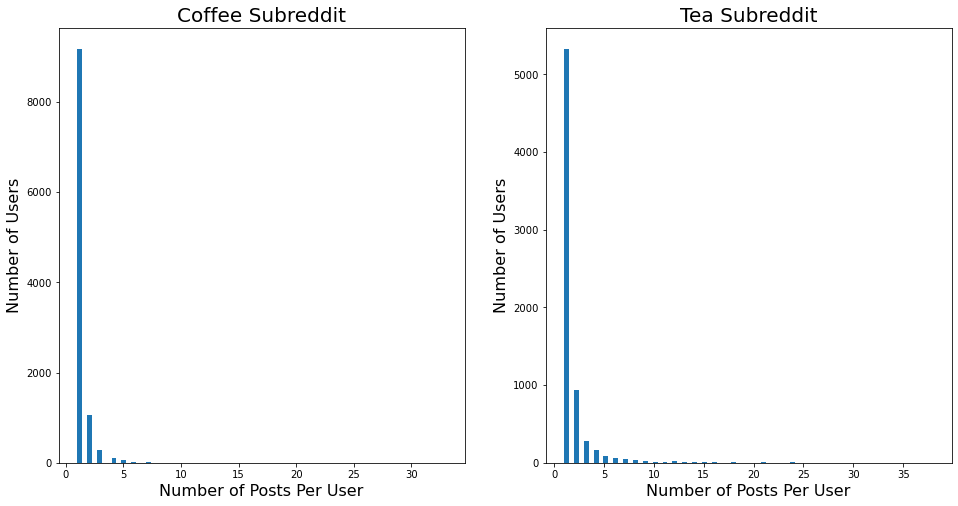

In [72]:
# Visualisation
plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)
plt.hist(coffee_df['author'].value_counts(), bins = 75)
plt.title("Coffee Subreddit", size = 20)
plt.xlabel('Number of Posts Per User', size = 16)
plt.ylabel('Number of Users', size = 16)

plt.subplot(1, 2, 2)
plt.hist(tea_df['author'].value_counts(), bins = 75)
plt.title("Tea Subreddit", size = 20)
plt.xlabel('Number of Posts Per User', size = 16)
plt.ylabel('Number of Users', size = 16);

### Observation
1. There are 10758 unique users in the Coffee subreddit and 7067 unique users in the Tea subreddit respectively. 
2. Average number of posts per user for Coffee and Tea subreddits is 1.25 and 1.69 posts respectively.
2. More than 70% users of each subreddit only posted one post.
3. Most of the users did not post more than 5 posts though there are more users in the tea subreddit who posted more than 5 posts.

### 5.2 Date Posted

In [73]:
print(f'Earlist post from Coffee Dataset: {coffee_df["date_posted"].min()}')
print(f'Earlist post from Tea Dataset: {tea_df["date_posted"].min()}')

Earlist post from Coffee Dataset: 2022-01-03
Earlist post from Tea Dataset: 2021-08-21


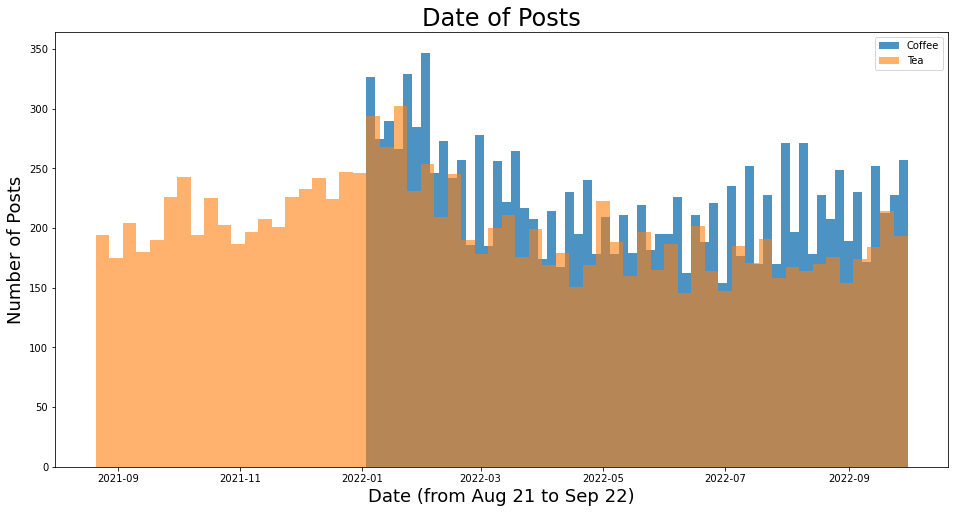

In [74]:
# Visualisation
plt.figure(figsize=(16,8))
plt.hist(coffee_df['date_posted'], bins = 60, alpha = 0.8)
plt.hist(tea_df['date_posted'], bins = 60, alpha = 0.6)
plt.title("Date of Posts", size = 24)
plt.xlabel('Date (from Aug 21 to Sep 22)', size = 18)
plt.ylabel('Number of Posts', size = 18)
plt.legend(["Coffee", "Tea"], loc=0);

### Observation
1. The Coffee subreddit recieves more posts on a daily basis than the Tea subreddit.
2. Despite having similar amount of data scrapped from each subreddit, the earliest post of the Tea subreddit stretches back to Aug 21, which is about 4 months earlier than the earlist post of the Coffee Dataset. This again reinforces the popularity of the Coffee subreddit as compared to Tea subreddit.

### 5.3 Popular Topics of Each Subreddit Thread

A key focus of the project is to identify useful and popular topics related to coffee and tea. The approach is to examine the most popular topics of each subreddit dataset using unigram, bigram and trigam and shortlist those which are interesting to generate business ideas for cafe set-up. To pick out the most common words, I will be using the count vectorizer.

#### Unigram

In [75]:
cvec = CountVectorizer(stop_words='english')
coffee_cvec = cvec.fit_transform(coffee_df['text_cleaned'])
warnings.simplefilter(action='ignore', category=FutureWarning)
coffee_cvec = pd.DataFrame.sparse.from_spmatrix(coffee_cvec, columns = cvec.get_feature_names())

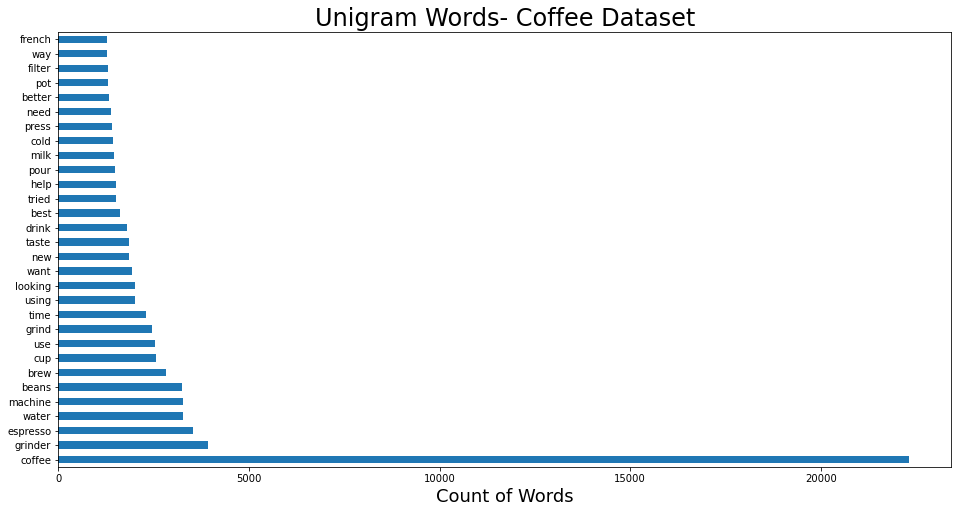

In [76]:
plt.figure(figsize=(16,8)) 
coffee_cvec.sum().sort_values(ascending=False).head(30).plot(kind="barh")
plt.xlabel('Count of Words', size = 18)
plt.title("Unigram Words- Coffee Dataset", size = 24);

In [77]:
cvec = CountVectorizer(stop_words='english')
tea_cvec = cvec.fit_transform(tea_df['text_cleaned'])
warnings.simplefilter(action='ignore', category=FutureWarning)
tea_cvec = pd.DataFrame.sparse.from_spmatrix(tea_cvec, columns = cvec.get_feature_names())

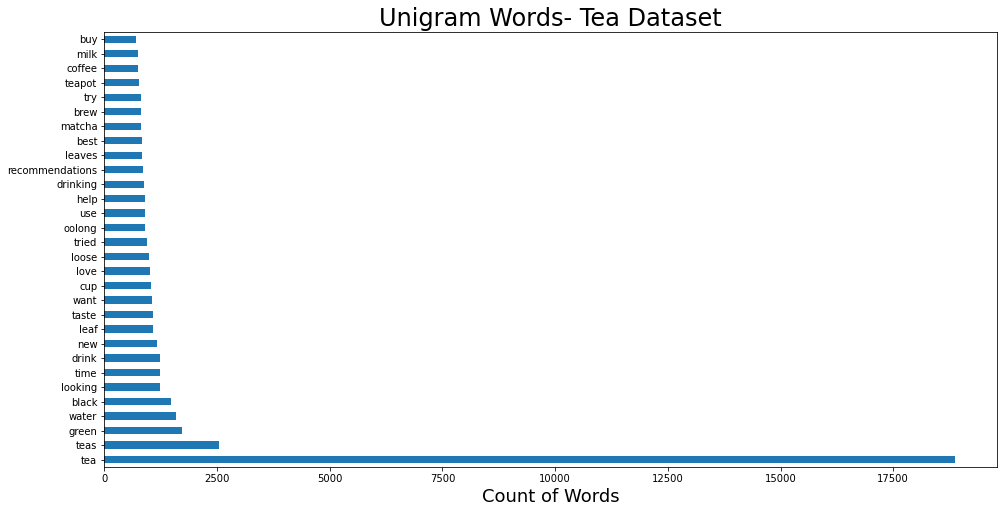

In [78]:
plt.figure(figsize=(16,8)) 
tea_cvec.sum().sort_values(ascending=False).head(30).plot(kind="barh")
plt.xlabel('Count of Words', size = 18)
plt.title("Unigram Words- Tea Dataset", size = 24);

#### Bigram

In [79]:
cvec2 = CountVectorizer(stop_words='english',ngram_range=(2,2))
coffee_cvec2 = cvec2.fit_transform(coffee_df['text_cleaned'])
coffee_cvec2 = pd.DataFrame.sparse.from_spmatrix(coffee_cvec2, columns = cvec2.get_feature_names())

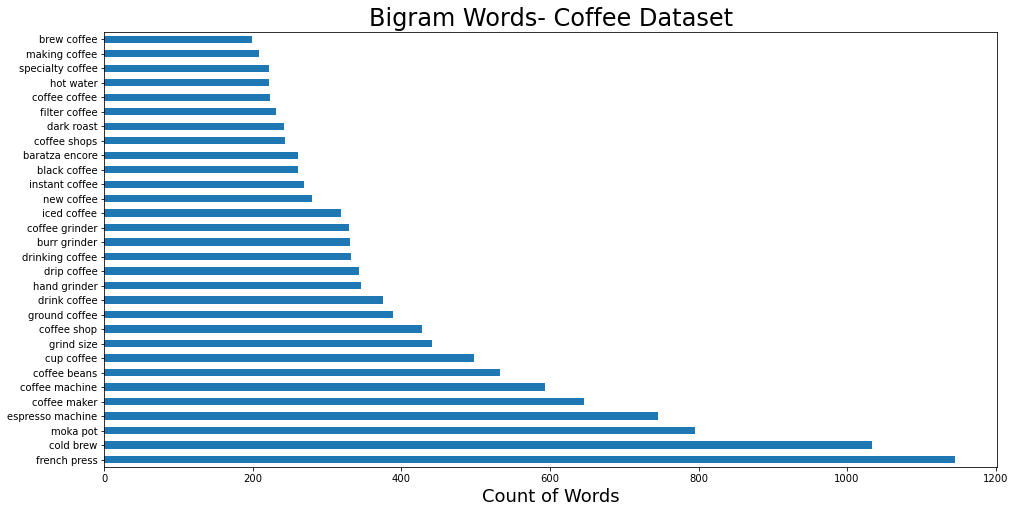

In [80]:
plt.figure(figsize=(16,8)) 
coffee_cvec2.sum().sort_values(ascending=False).head(30).plot(kind="barh")
plt.xlabel('Count of Words', size = 18)
plt.title("Bigram Words- Coffee Dataset", size = 24);

In [81]:
tea2 = CountVectorizer(stop_words='english',ngram_range=(2,2))
tea_cvec2 = tea2.fit_transform(tea_df['text_cleaned'])
tea_cvec2 = pd.DataFrame.sparse.from_spmatrix(tea_cvec2, columns = tea2.get_feature_names())

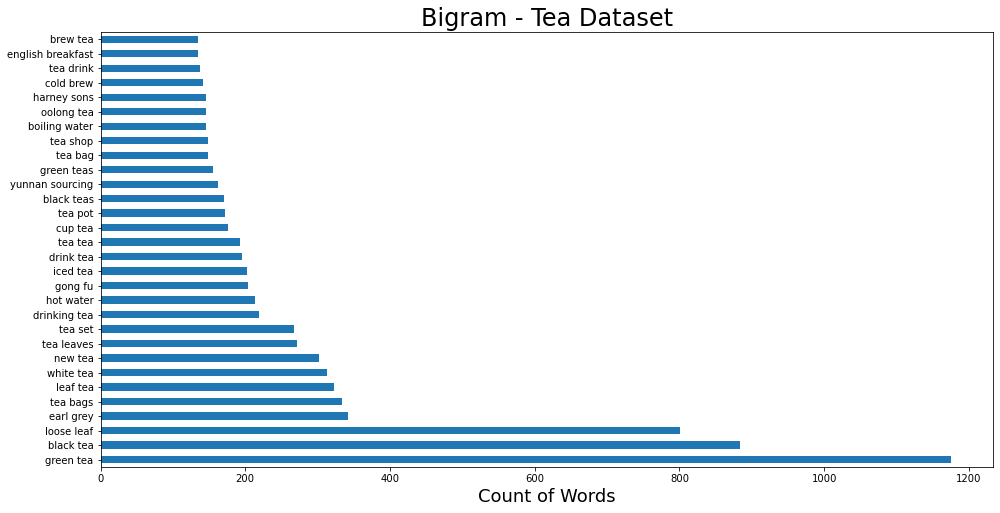

In [82]:
plt.figure(figsize=(16,8)) 
tea_cvec2.sum().sort_values(ascending=False).head(30).plot(kind="barh")
plt.xlabel('Count of Words', size = 18)
plt.title("Bigram - Tea Dataset", size = 24);

#### Trigram

In [83]:
cvec3 = CountVectorizer(stop_words='english',ngram_range=(3,3))
coffee_cvec3 = cvec3.fit_transform(coffee_df['text_cleaned'])

In [84]:
coffee_cvec3 = pd.DataFrame.sparse.from_spmatrix(coffee_cvec3, columns = cvec3.get_feature_names())

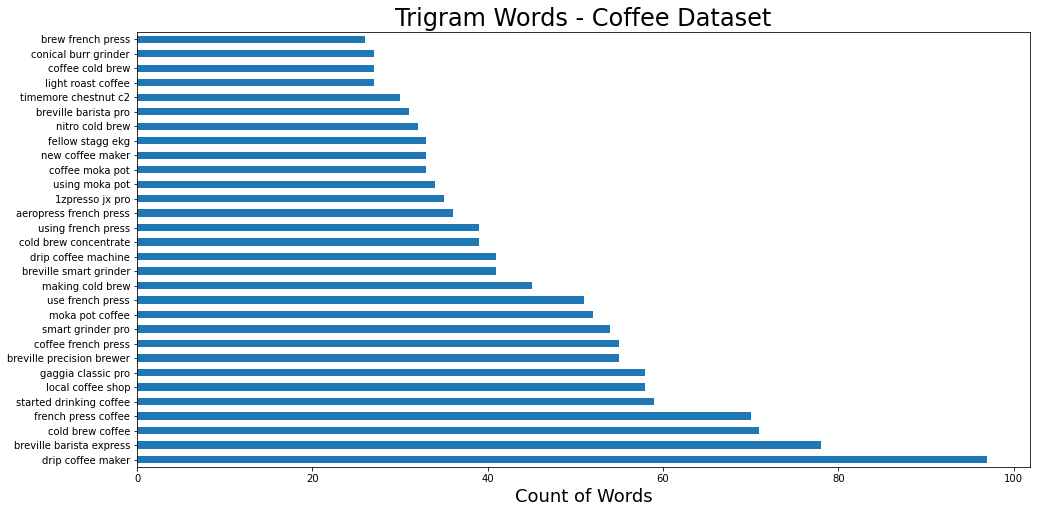

In [85]:
plt.figure(figsize=(16,8)) 
coffee_cvec3.sum().sort_values(ascending=False).head(30).plot(kind="barh")
plt.xlabel('Count of Words', size = 18)
plt.title("Trigram Words - Coffee Dataset", size = 24);

In [86]:
cvec3 = CountVectorizer(stop_words='english',ngram_range=(3,3))
tea_cvec3 = cvec3.fit_transform(tea_df['text_cleaned'])
tea_cvec3 = pd.DataFrame.sparse.from_spmatrix(tea_cvec3, columns = cvec3.get_feature_names())

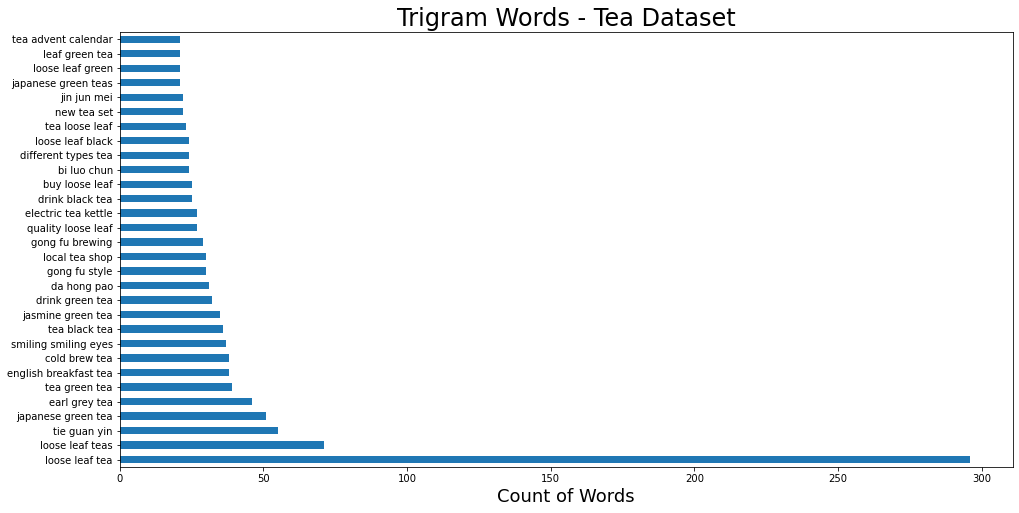

In [87]:
plt.figure(figsize=(16,8)) 
tea_cvec3.sum().sort_values(ascending=False).head(30).plot(kind="barh")
plt.xlabel('Count of Words', size = 18)
plt.title("Trigram Words - Tea Dataset", size = 24);

### Observation

1. The unigram, bigram and trigram graphs are able to pick out popular words from the respective subreddit.
2. Unigram graphs as compared to bigram and trigram graphs are less helpful as the words lack context and are too general.
3. The findings can generally be categorised into:
    - Types of coffee/ tea;
    - Types of coffee/ tea making technique; and 
    - Specific brands for coffe/tea products.
4. Promising topics from Coffee subreddit (21 in total):
    - Espresso, Speciality Coffee, Filter Coffee, Dark Roast, Baratza Encore, Burr Grinder, Drip Coffee, Ground Coffee, Moka Pot, French Press, Cold Brew, Timemore Chestnut C2, Breville Barista Pro, Nitro Cold Brew, Fellow Stagg Ekg, 1Zpresso Jx Pro, Aeropress French Press, Breville Smart Grinder, Breville Precision Brewer, Gaggia Classic Pro, Breville Barista Express
5. Promising topics from Tea subreddit (16 in total):
    - Matcha, English Breakfast, Cold Brew, Harney Sons, Oolong Tea, Green Tea, Black Tea, Gong Fu, White Tea, Earl Grey, Da Hong Pao, Tie Guan Yin, Jin Jun Mei, Bi Luo Chun, Jasmine Green Tea, Japanese Green Tea
6. Topics for further sentimenal analysis (under notebook 3):

## 6. Summary of Notebook 1

Below is a summary of the main findings covered in this notebook :-

**1. Data Cleaning Process**. The imported datasets began with 14979 rows and 82 columns, and 14971 rows and 85 columns for Coffee and Tea respectively. The following adjustments were made to each dataset as part of data cleaning :-
   - Removed all the irrevelant columns;
   - Removed posts that were removed from each subreddit; 
   - Removed recurring and duplicated posts; 
   - Created a new column 'text' by combining the title and body of posts;
   - Created and edited a new column 'text_cleaned' for EDA purpose and further analysis under notebook 2; 
   - Result: Coffee dataset is left with 13457 rows and 5 columns, while tea data has 11950 rows and 5 columns.    

**2. Key Points from EDA.**
   - Post from users: More than 70% users of each subreddit only posted one post. Coffee subreddit has more unique users but less posts per users as compared to tea.
   - Date of posts: Coffee subreddit receives more posts on a daily basis. Despite scraping the same amount of data (15000 posts), the earliest post of Tea subreddit was back in Aug 21 which is four months before the earliest post of Coffee subreddit. 
   - Unigram/ bigram/ trigram analysis:
        - Promising topics can be classified into types of coffee/ tea, types of coffee/ tea making technique and specific brands for coffe/tea products
        - Promising topics from Coffee dataset (21 in total): Espresso, Speciality Coffee, Filter Coffee, Dark Roast, Baratza Encore, Burr Grinder, Drip Coffee, Ground Coffee, Moka Pot, French Press, Cold Brew, Timemore Chestnut C2, Breville Barista Pro, Nitro Cold Brew, Fellow Stagg Ekg, 1Zpresso Jx Pro, Aeropress French Press, Breville Smart Grinder, Breville Precision Brewer, Gaggia Classic Pro, Breville Barista Express
        - Promising topics from Tea dataset (16 in total): Matcha, English Breakfast, Cold Brew, Harney Sons, Oolong Tea, Green Tea, Black Tea, Gong Fu, White Tea, Earl Grey, Da Hong Pao, Tie Guan Yin, Jin Jun Mei, Bi Luo Chun, Jasmine Green Tea, Japanese Green Tea
        - These topics will undergo sentiment analysis under notebook 3. 